# Libreria 

In [1]:
import pandas as pd
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
#parsear XML
import csv   
from lxml import etree
#Parsear HTML
import requests
import urllib.request
from bs4 import BeautifulSoup
from urllib.request import urlopen
from bs4.builder import HTMLParserTreeBuilder
#para medir tiempo
from time import time 
import time

# Carga de Archivos XML

In [2]:
org = 'tac'
ORGANISM = org
maxi ='01100'

pathways = requests.get('http://rest.kegg.jp/list/pathway/' + ORGANISM)  #lista de las vias metabolicas y otra informacion porpocionada por KEGG

for line in pathways.text.split('\n'):         # Se recorre la lista propocionada por  KEGG donde se estraen los nombres de las vias de KEGG
      pathwayid = line.split('\t')[0].replace('path:', '') 
      A = pathwayid+'.xml'                     # Le ponemos la extencion .xml para poder cargar los archivos
      if A == str(org)+str(maxi)+'.xml':           
            break
      locals()[str(pathwayid)] = etree.parse(A) # Guarda los  XML com el nombre de la via asignado por KEGG
      locals()[str(pathwayid)] = locals()[str(pathwayid)].getroot()  # Para transformar todos lo XML en directorios de python

## ARMANDO BASE DE DATOS CON PANDAS

##### crear archivo csv para guardar los datos. 

In [3]:
#data= pd.DataFrame(columns=('n', 'enzima', 'gen', 'nob_Keeg', 'path' ,'link')) # Crear tabla csv. 
#data.to_csv('data_'+org+'.csv', sep=';')                              

In [9]:
save=len(pd.read_csv('data_'+org+'.csv',index_col=0, delimiter=';')[['n']].values)
print(save)

693


In [7]:
save=len(pd.read_csv('data_'+org+'.csv',index_col=0, delimiter=';')[['n']].values)

n=0

for line in pathways.text.split('\n'):
    
    pathwayid = line.split('\t')[0].replace('path:', '') 
    
    if pathwayid ==  str(org)+str(maxi):           
            break
    
    ii=locals()[str(pathwayid)]
    
    
    for i in range(0,len(ii)):
       
        if ii[i].tag=='entry':         
            A=ii[i].attrib            
            if A['type'] == 'gene':
                n=1+n
                
                if n > save:
                    
                    url = A['link']
                
                    response = requests.get(url)
                    soup = BeautifulSoup(response.text, "html.parser")
                    
                    gen    = soup.html.body.div.table.form.td.table.find_all('td')[3].find_all('div')[0].text.replace('\n', ' ').strip().split()[0].replace(',','')
                    
                    if gen == '(GenBank)' or gen == '(RefSeq)' :
                        ll=6
                    else:
                        ll=7
                    
                    enzima = soup.html.body.div.table.form.td.table.find_all('td')[ll].text.strip()
                    
                    NewDat = [n , A['id'] , enzima, gen , A['name'].split( )[0] , pathwayid , A['link'] ]
                
                                
                    with open(r'data_'+org+'.csv', 'a' , newline='') as f:
                        writer = csv.writer(f,delimiter=';')
                        writer.writerow(NewDat)
                                              


In [8]:

n=0

for line in pathways.text.split('\n'):
    
    pathwayid = line.split('\t')[0].replace('path:', '') 
    
    if pathwayid == str(org)+str(maxi):           
            break
            
  
    ii=locals()[str(pathwayid)]
    
        
    
    for i in range(0,len(ii)):
       
        if ii[i].tag=='entry':         
            A=ii[i].attrib            
            if A['type'] == 'group':
                n=1+n 
                
                NewDat = [n , A['id'] , 'undefined_Enzima'+pathwayid , 'none' ,  A['name'] , pathwayid , 'no link']
                
                        
                with open(r'data_'+org+'.csv', 'a' , newline='') as f:
                    writer = csv.writer(f , delimiter=';')
                    writer.writerow(NewDat)            
           
                          

In [10]:
data=pd.read_csv('data_'+org+'.csv',index_col=0, sep=';')
data=data[['n' ,'enzima', 'nob_Keeg' ,'path']]
data=data.values
data

array([["'14'",
        'fructose 1,6-bisphosphate aldolase/phosphatase [EC:4.1.2.13 3.1.3.11]',
        'tac:Ta1428', 'tac00010'],
       ['14',
        'fructose 1,6-bisphosphate aldolase/phosphatase [EC:4.1.2.13 3.1.3.11]',
        'tac:Ta1428', 'tac00010'],
       ['38', 'aldehyde dehydrogenase (NAD+) [EC:1.2.1.3]', 'tac:Ta0439',
        'tac00010'],
       ...,
       ['174', 'tRNA His', 'tac:tRNA-His', 'tac00970'],
       ['176', 'tRNA Tyr', 'tac:tRNA-Tyr', 'tac00970'],
       ['177', 'tRNA Trp', 'tac:tRNA-Trp', 'tac00970']], dtype=object)

In [11]:
for line in pathways.text.split('\n'):
    
    pathwayid = line.split('\t')[0].replace('path:', '') 
    
    if pathwayid == str(org)+str(maxi):           
            break
    
    locals()['NODES_'+str(pathwayid)]={}
    
    for i in data:
        if i[3] == pathwayid:
            locals()['NODES_'+str(pathwayid)][i[0]]= i[1] 
            print(i[0],i[1], i[2], i[3])
    

'14' fructose 1,6-bisphosphate aldolase/phosphatase [EC:4.1.2.13 3.1.3.11] tac:Ta1428 tac00010
14 fructose 1,6-bisphosphate aldolase/phosphatase [EC:4.1.2.13 3.1.3.11] tac:Ta1428 tac00010
38 aldehyde dehydrogenase (NAD+) [EC:1.2.1.3] tac:Ta0439 tac00010
39 acetate---CoA ligase (ADP-forming) [EC:6.2.1.13] tac:Ta1153 tac00010
48 pyruvate dehydrogenase E1 component beta subunit [EC:1.2.4.1] tac:Ta1437 tac00010
49 pyruvate dehydrogenase E1 component beta subunit [EC:1.2.4.1] tac:Ta1437 tac00010
50 pyruvate dehydrogenase E2 component (dihydrolipoamide acetyltransferase) [EC:2.3.1.12] tac:Ta1436 tac00010
53 pyruvate kinase [EC:2.7.1.40] tac:Ta0896 tac00010
55 enolase [EC:4.2.1.11] tac:Ta0882 tac00010
58 triosephosphate isomerase (TIM) [EC:5.3.1.1] tac:Ta0313 tac00010
60 fructose 1,6-bisphosphate aldolase/phosphatase [EC:4.1.2.13 3.1.3.11] tac:Ta1428 tac00010
62 glucose/mannose-6-phosphate isomerase [EC:5.3.1.9 5.3.1.8] tac:Ta1419 tac00010
63 phosphomannomutase / phosphoglucomutase [EC:5.4.2.

281 glutamate-1-semialdehyde 2,1-aminomutase [EC:5.4.3.8] tac:Ta0571 tac00860
283 glutamyl-tRNA reductase [EC:1.2.1.70] tac:Ta0536 tac00860
284 glutamyl-tRNA synthetase [EC:6.1.1.17] tac:Ta0942 tac00860
285 precorrin-2 dehydrogenase / sirohydrochlorin ferrochelatase [EC:1.3.1.76 4.99.1.4] tac:Ta0652 tac00860
286 precorrin-2 dehydrogenase / sirohydrochlorin ferrochelatase [EC:1.3.1.76 4.99.1.4] tac:Ta0652 tac00860
288 precorrin-2/cobalt-factor-2 C20-methyltransferase [EC:2.1.1.130 2.1.1.151] tac:Ta0658 tac00860
289 precorrin-3B C17-methyltransferase [EC:2.1.1.131] tac:Ta0655 tac00860
290 precorrin-4/cobalt-precorrin-4 C11-methyltransferase [EC:2.1.1.133 2.1.1.271] tac:Ta0659 tac00860
293 cobalt-precorrin-6B (C15)-methyltransferase [EC:2.1.1.196] tac:Ta0657 tac00860
294 precorrin-2/cobalt-factor-2 C20-methyltransferase [EC:2.1.1.130 2.1.1.151] tac:Ta0658 tac00860
296 precorrin-3B C17-methyltransferase [EC:2.1.1.131] tac:Ta0655 tac00860
297 precorrin-4/cobalt-precorrin-4 C11-methyltransfe

In [12]:
NODES_tac00010

{"'14'": 'fructose 1,6-bisphosphate aldolase/phosphatase [EC:4.1.2.13 3.1.3.11]',
 '14': 'fructose 1,6-bisphosphate aldolase/phosphatase [EC:4.1.2.13 3.1.3.11]',
 '38': 'aldehyde dehydrogenase (NAD+) [EC:1.2.1.3]',
 '39': 'acetate---CoA ligase (ADP-forming) [EC:6.2.1.13]',
 '48': 'pyruvate dehydrogenase E1 component beta subunit [EC:1.2.4.1]',
 '49': 'pyruvate dehydrogenase E1 component beta subunit [EC:1.2.4.1]',
 '50': 'pyruvate dehydrogenase E2 component (dihydrolipoamide acetyltransferase) [EC:2.3.1.12]',
 '53': 'pyruvate kinase [EC:2.7.1.40]',
 '55': 'enolase [EC:4.2.1.11]',
 '58': 'triosephosphate isomerase (TIM) [EC:5.3.1.1]',
 '60': 'fructose 1,6-bisphosphate aldolase/phosphatase [EC:4.1.2.13 3.1.3.11]',
 '62': 'glucose/mannose-6-phosphate isomerase [EC:5.3.1.9 5.3.1.8]',
 '63': 'phosphomannomutase / phosphoglucomutase [EC:5.4.2.8 5.4.2.2]',
 '64': 'glucose/mannose-6-phosphate isomerase [EC:5.3.1.9 5.3.1.8]',
 '66': 'glucokinase [EC:2.7.1.2]',
 '67': 'glucose/mannose-6-phosphat

## PRIMERA RED

In [13]:
EDGES=[]

for line in pathways.text.split('\n'):        
    pathwayid = line.split('\t')[0].replace('path:', '') 
    
    if pathwayid == str(org)+str(maxi):           
            break
            
    ii=locals()[str(pathwayid)]
    
    NODES=locals()['NODES_'+str(pathwayid)]
   
    for i in range(0,len(ii)):
        if ii[i].tag=='relation':         
            A=ii[i].attrib            
            if A['type'] == 'ECrel':    #relación enzima-enzima, que indica dos enzimas que catalizan pasos de reacción sucesivos
                #print(A)
                EDGES.append( [  NODES[ A['entry1'] ] , NODES[ A['entry2'] ]  ]  ) 

print(EDGES)                

[['aldose 1-epimerase [EC:5.1.3.3]', 'glucokinase [EC:2.7.1.2]'], ['glucokinase [EC:2.7.1.2]', 'aldose 1-epimerase [EC:5.1.3.3]'], ['glucose/mannose-6-phosphate isomerase [EC:5.3.1.9 5.3.1.8]', 'glucokinase [EC:2.7.1.2]'], ['glucose/mannose-6-phosphate isomerase [EC:5.3.1.9 5.3.1.8]', 'glucokinase [EC:2.7.1.2]'], ['glucose/mannose-6-phosphate isomerase [EC:5.3.1.9 5.3.1.8]', 'phosphomannomutase / phosphoglucomutase [EC:5.4.2.8 5.4.2.2]'], ['glucose/mannose-6-phosphate isomerase [EC:5.3.1.9 5.3.1.8]', 'glucokinase [EC:2.7.1.2]'], ['phosphomannomutase / phosphoglucomutase [EC:5.4.2.8 5.4.2.2]', 'glucokinase [EC:2.7.1.2]'], ['phosphomannomutase / phosphoglucomutase [EC:5.4.2.8 5.4.2.2]', 'glucose/mannose-6-phosphate isomerase [EC:5.3.1.9 5.3.1.8]'], ['fructose 1,6-bisphosphate aldolase/phosphatase [EC:4.1.2.13 3.1.3.11]', 'glucose/mannose-6-phosphate isomerase [EC:5.3.1.9 5.3.1.8]'], ['fructose 1,6-bisphosphate aldolase/phosphatase [EC:4.1.2.13 3.1.3.11]', 'fructose 1,6-bisphosphate aldol

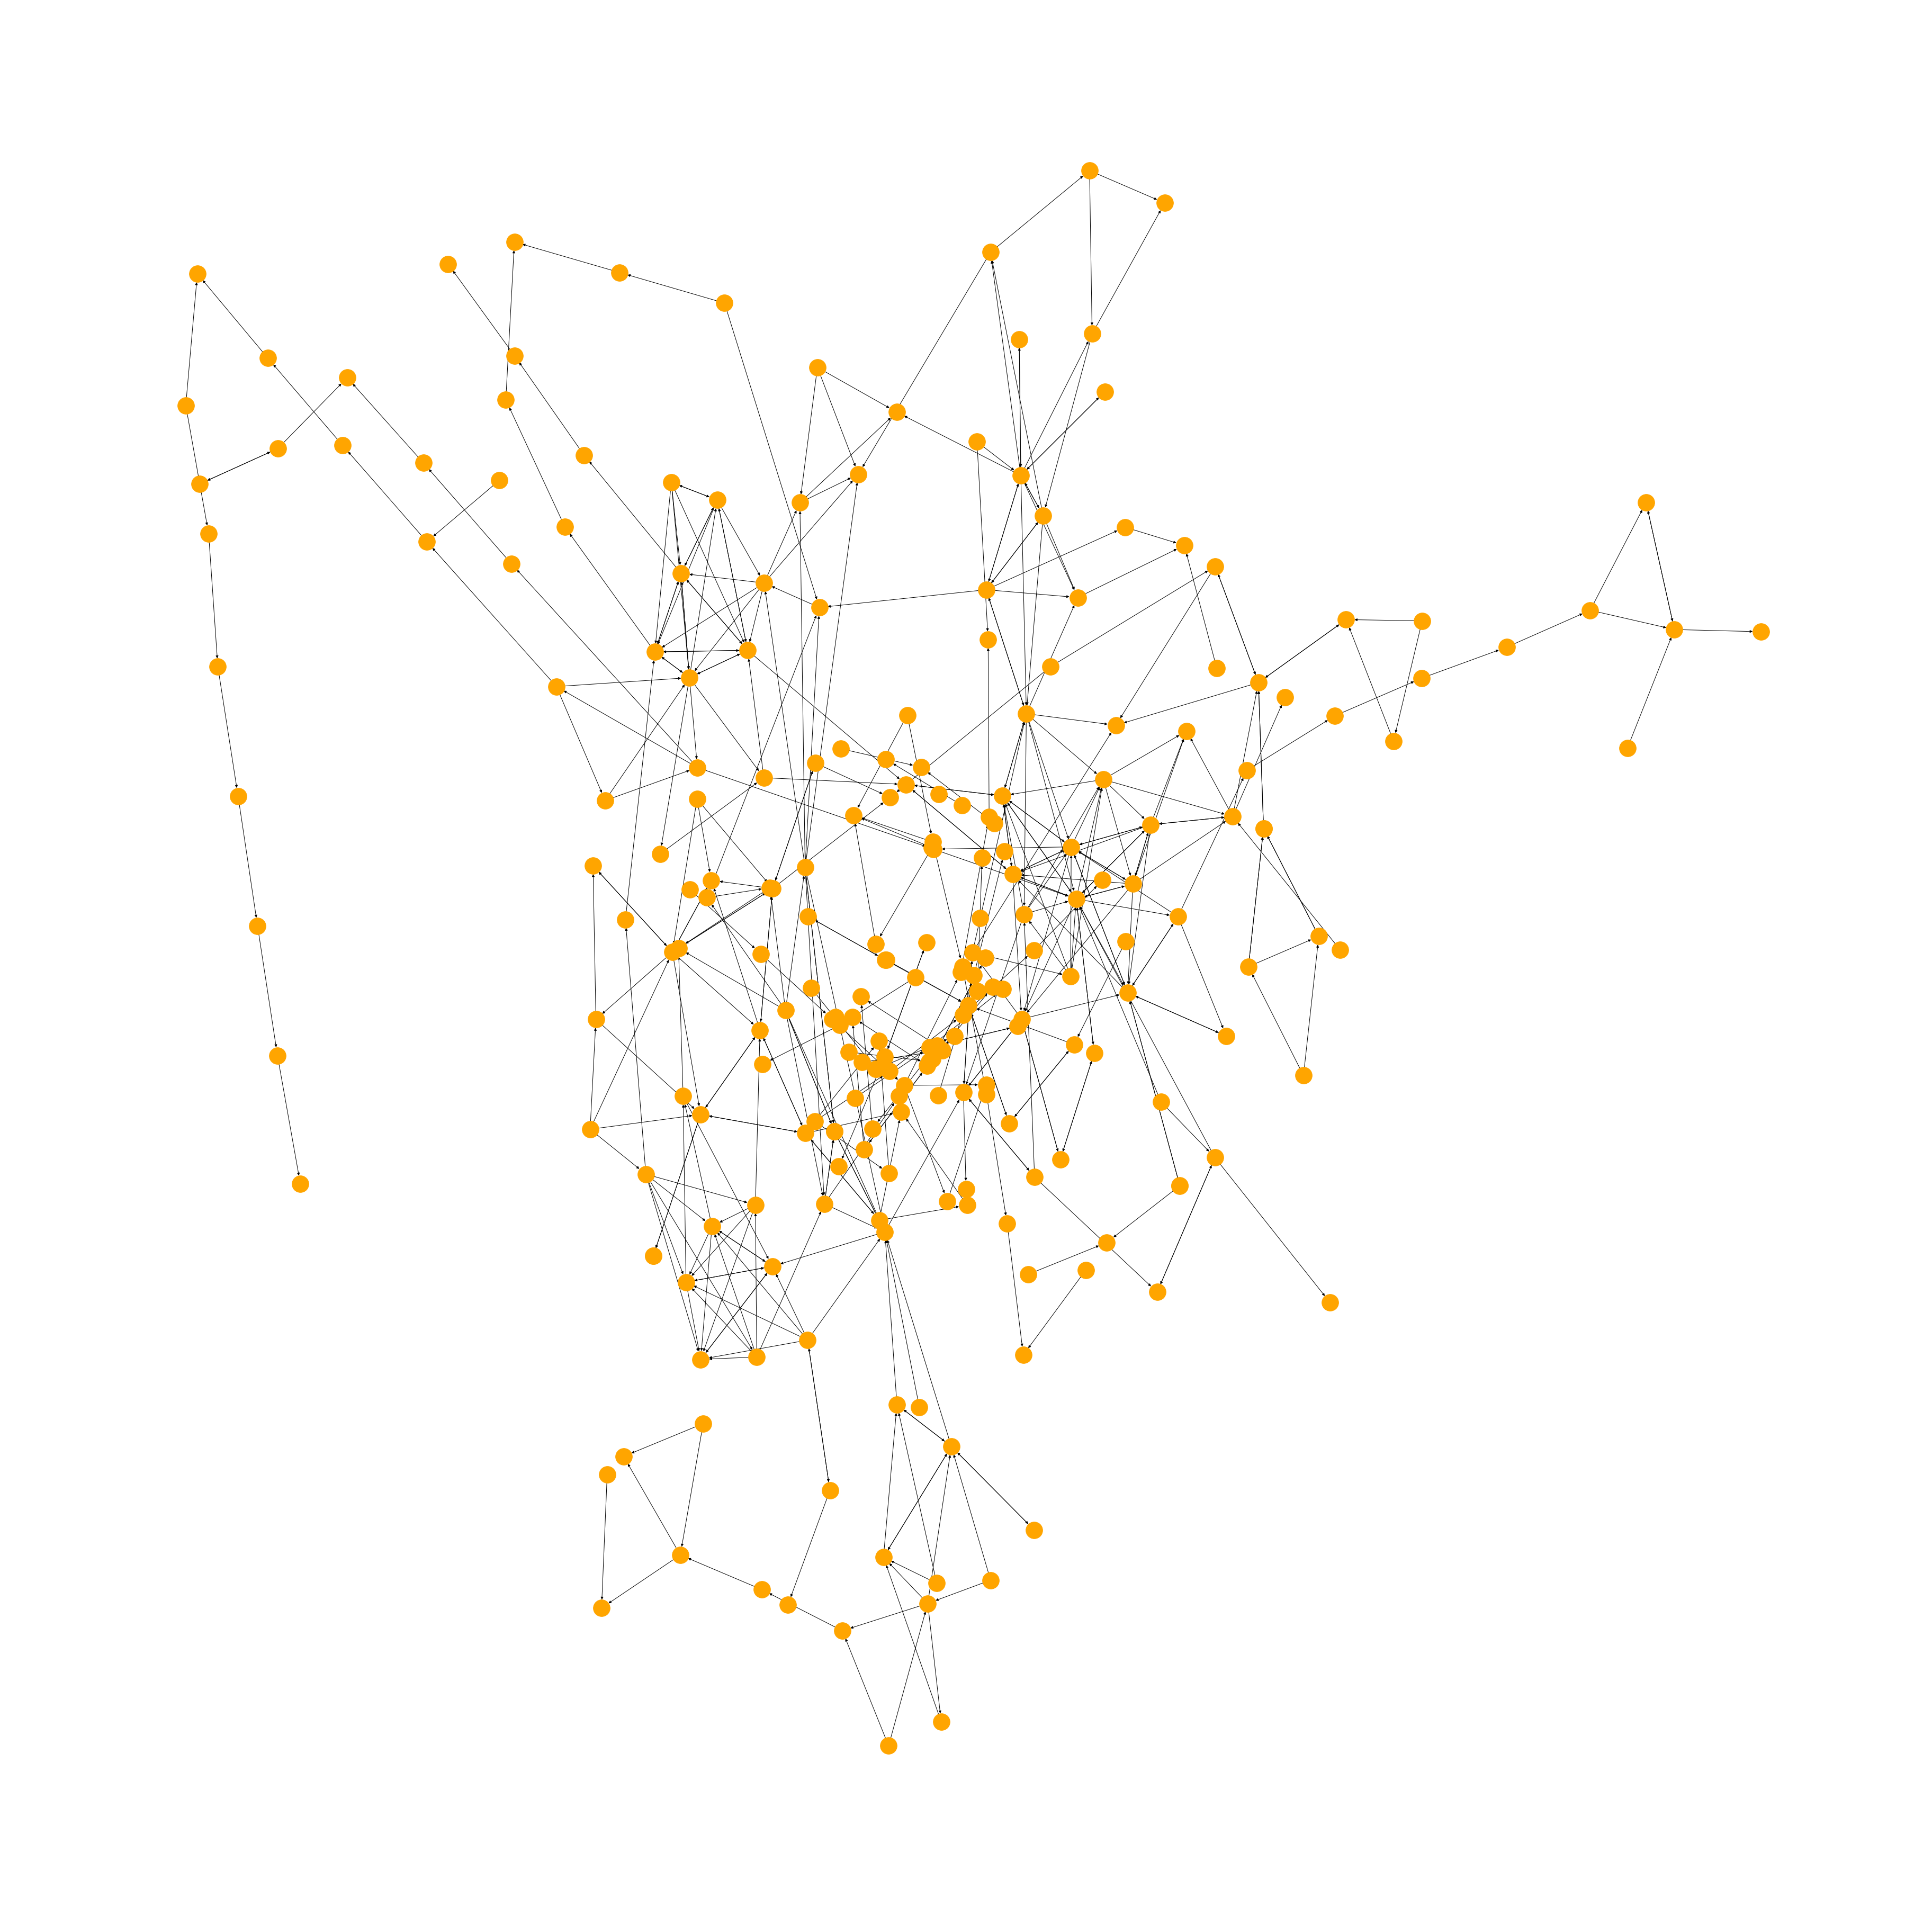

In [14]:
G = nx.DiGraph() #--->DiGrafo para hacer un grado dirigido 
 
G.add_edges_from(EDGES)


plt.figure(3,figsize=(50,50))
nx.draw_kamada_kawai(G,font_size=15,node_size=1000,node_color='orange',with_labels=False)
plt.savefig("net_"+org+"1.pdf")# Guardar la red en pdf. 
plt.show()

In [15]:
g=nx.number_of_nodes(G)
print('g=',g)
L=nx.number_of_edges(G)
print('L=',L)

g= 240
L= 471


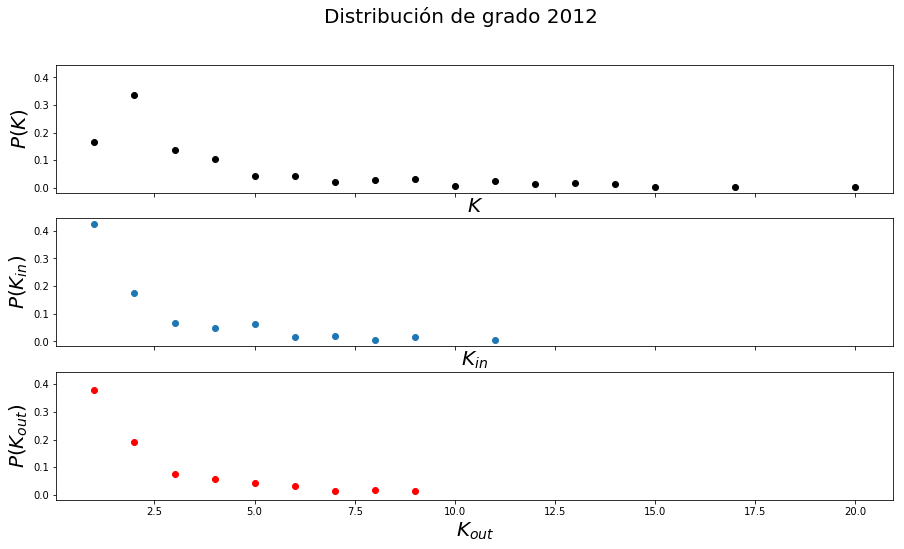

In [16]:
nodos=G.nodes

D=[] # un vector donde vamos a colocar el numero de vinvulos de todos los nodos
d=nx.degree(G) # Vector que contiene el par ordenado del nodo y su numero de vinculos
for i in nodos: 
    D.append(d[i])
    

D_in=[] # un vector donde vamos a colocar el numero de vinvulos de todos los nodos
d=G.in_degree(G) # Vector que contiene el par ordenado del nodo y su numero de vinculos
for i in nodos: 
    D_in.append(d[i])
    
    
D_out=[] # un vector donde vamos a colocar el numero de vinvulos de todos los nodos
d=G.out_degree(G) # Vector que contiene el par ordenado del nodo y su numero de vinculos
for i in nodos: 
    D_out.append(d[i])
    
    
P=[]
X=[]
for i in range(1,max(D)+1):
    if D.count(i) != 0: 
        P.append(D.count(i)/len(D))
        X.append(i)
        
P_in=[]
X_in=[]
for i in range(1,max(D_in)+1):
    if D_in.count(i) != 0: 
        P_in.append(D_in.count(i)/len(D_in))
        X_in.append(i)  

P_out=[]
X_out=[]
for i in range(1,max(D)+1):
    if D_out.count(i) != 0: 
        P_out.append(D_out.count(i)/len(D_out))
        X_out.append(i)
        
        
        
# GRAFICA DE LA PROVAVILIDAD VS EL NUMERO DE GRADO        
fig, axs = plt.subplots( 3 ,sharex = True, sharey = True, figsize=(15,8))

fig.suptitle('Distribución de grado 2012',fontsize=20)
axs[0].plot(X,P,'ko')         
axs[0].set_xlabel(r'$K$',fontsize=20)
axs[0].set_ylabel(r'$P(K)$',fontsize=20)

axs[1].plot(X_in,P_in,'o')         
axs[1].set_xlabel(r'$K_{in}$',fontsize=20)
axs[1].set_ylabel(r'$P(K_{in})$',fontsize=20)

axs[2].plot(X_out,P_out, 'ro')         
axs[2].set_xlabel(r'$K_{out}$',fontsize=20)
axs[2].set_ylabel(r'$P(K_{out})$',fontsize=20)

#plt.savefig("P_vs_k_2012.pdf")# Guardar la red en pdf.    

plt.show()

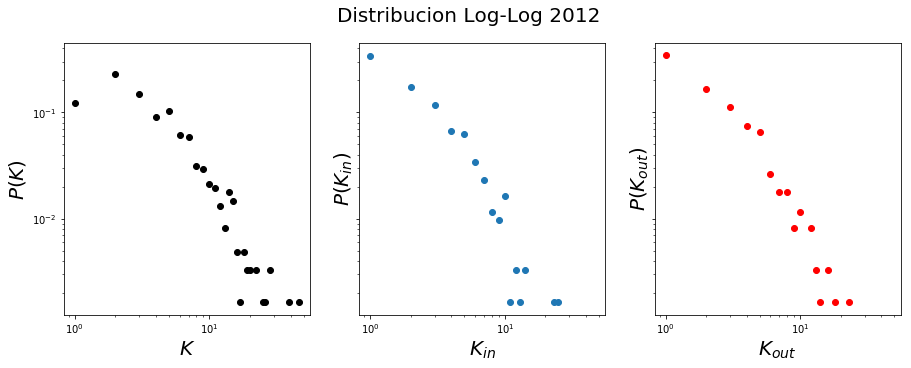

In [20]:

fig, (ax1, ax2 , ax3) = plt.subplots(1, 3 ,sharex = True, sharey = True, figsize=(15,5))
fig.suptitle('Distribucion Log-Log 2012',fontsize=20)
ax1.plot(X,P,'ko')
ax1.set_xlabel(r'$K$',fontsize=20)
ax1.set_ylabel(r'$P(K)$',fontsize=20)

ax2.plot(X_in,P_in,'o')
ax2.set_xlabel(r'$K_{in}$',fontsize=20)
ax2.set_ylabel(r'$P(K_{in})$',fontsize=20)

ax3.plot(X_out,P_out,'ro')
ax3.set_xlabel(r'$K_{out}$',fontsize=20)
ax3.set_ylabel(r'$P(K_{out})$',fontsize=20)

# Escala log-log
plt.xscale('log') 
plt.yscale('log') 

#plt.savefig("Ley_de_potencias_2012.pdf")# Guardar la red en pdf.

plt.show()

In [17]:
d=G.degree(G) #Vector con el par ordenado de numero de aristas de entrada a cada uno de los nodos
d_in=G.in_degree(G)
d_out=G.out_degree(G)
degre=[]

for i in G.nodes:
    degre.append([i,d[i],d_in[i],d_out[i], d_in[i]-d_out[i] ])
df=pd.DataFrame(degre,columns=['Nombre', 'grado', 'grado_in', 'grado_out','dif_grado'])
df.sort_values(by='dif_grado', ascending=False)

,Nombre,grado,grado_in,grado_out,dif_grado
55,aspartate aminotransferase [EC:2.6.1.1],11,9,2,7
92,glutamate synthase (NADPH) small chain [EC:1.4...,8,7,1,6
44,acetyl-CoA C-acetyltransferase [EC:2.3.1.9],13,9,4,5
70,nucleoside kinase [EC:2.7.1.73 2.7.1.213 2.7.1.-],5,5,0,5
10,enolase [EC:4.2.1.11],4,4,0,4
210,uroporphyrin-III C-methyltransferase [EC:2.1.1...,4,4,0,4
165,acylphosphatase [EC:3.6.1.7],4,4,0,4
40,beta-galactosidase [EC:3.2.1.23],5,4,1,3
78,XTP/dITP diphosphohydrolase [EC:3.6.1.66],3,3,0,3
62,phosphoribosylglycinamide formyltransferase 1 ...,13,8,5,3


In [21]:
intr=nx.betweenness_centrality(G) #dicionario en python
intr = pd.DataFrame([[key, intr[key]] for key in intr.keys()], columns=['Name', 'intermediacion'])
print(intr.sort_values(by='intermediacion', ascending=False))

                                                  Name  intermediacion
170  aspartate aminotransferase, cytoplasmic [EC:2....        0.080279
19                       pyruvate kinase [EC:2.7.1.40]        0.066031
1                              hexokinase [EC:2.7.1.1]        0.065222
11   2,3-bisphosphoglycerate-dependent phosphoglyce...        0.056590
18          aldehyde dehydrogenase (NAD+) [EC:1.2.1.3]        0.055253
4                      phosphoglucomutase [EC:5.4.2.2]        0.049236
243  glutamine---fructose-6-phosphate transaminase ...        0.048742
44                          transketolase [EC:2.2.1.1]        0.045338
10                phosphoglycerate kinase [EC:2.7.2.3]        0.041271
9    glyceraldehyde 3-phosphate dehydrogenase [EC:1...        0.040072
245              glutamate decarboxylase [EC:4.1.1.15]        0.039165
12                               enolase [EC:4.2.1.11]        0.035353
241            glutamate synthase (NADH) [EC:1.4.1.14]        0.035244
70    